In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Ej 1: Dada la tabla de datos, utilizar “a mano” el metodo de k-medias para agrupar los datos en 2 clusters.

## a) Comenzando con b1 = (1, 2) y b2 = (3, 2)

In [2]:
# Creamos el Dataframe con los datos

data = {'x': [-1, 0, 1, 8/5, 2, 3, 4],
    'y': [2, 1, 2, 2, 1, 2, 1]}
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df.head(7)

,x,y
0,-1.0,2
1,0.0,1
2,1.0,2
3,1.6,2
4,2.0,1
5,3.0,2
6,4.0,1


In [3]:
# DATOS

# El comando make_blobs genera datos aleatorios en nubes
# En la primera variable X guardamos las coordenadas
# La segunda variable v indica a qué nube pertenece cada dato.

X, v = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

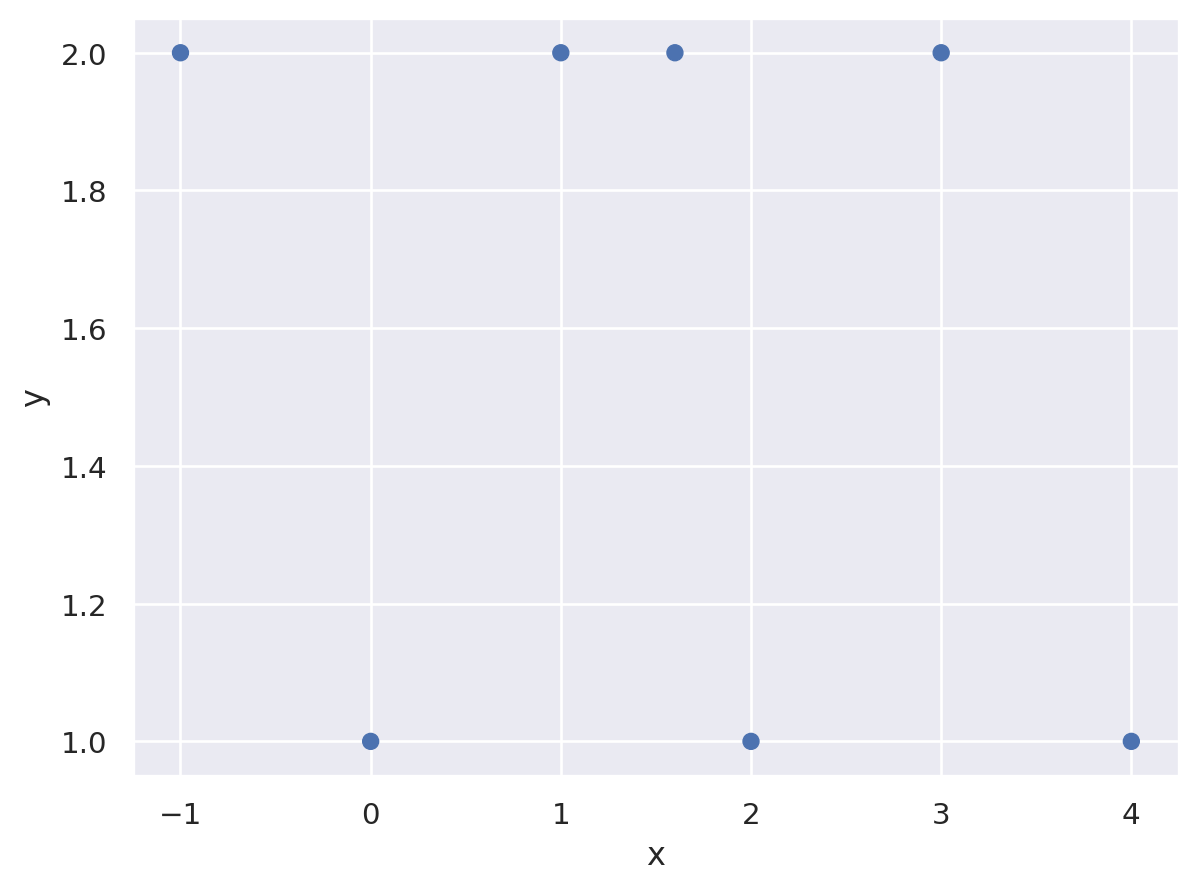

In [4]:
# Graficamos
(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot())
)

In [5]:
# Fijamos centros para los clusters, utilizamos los que nos dan:
# b1 = (1, 2), b2 = (3, 2)
centros = np.array([[1, 2], [3, 1]])

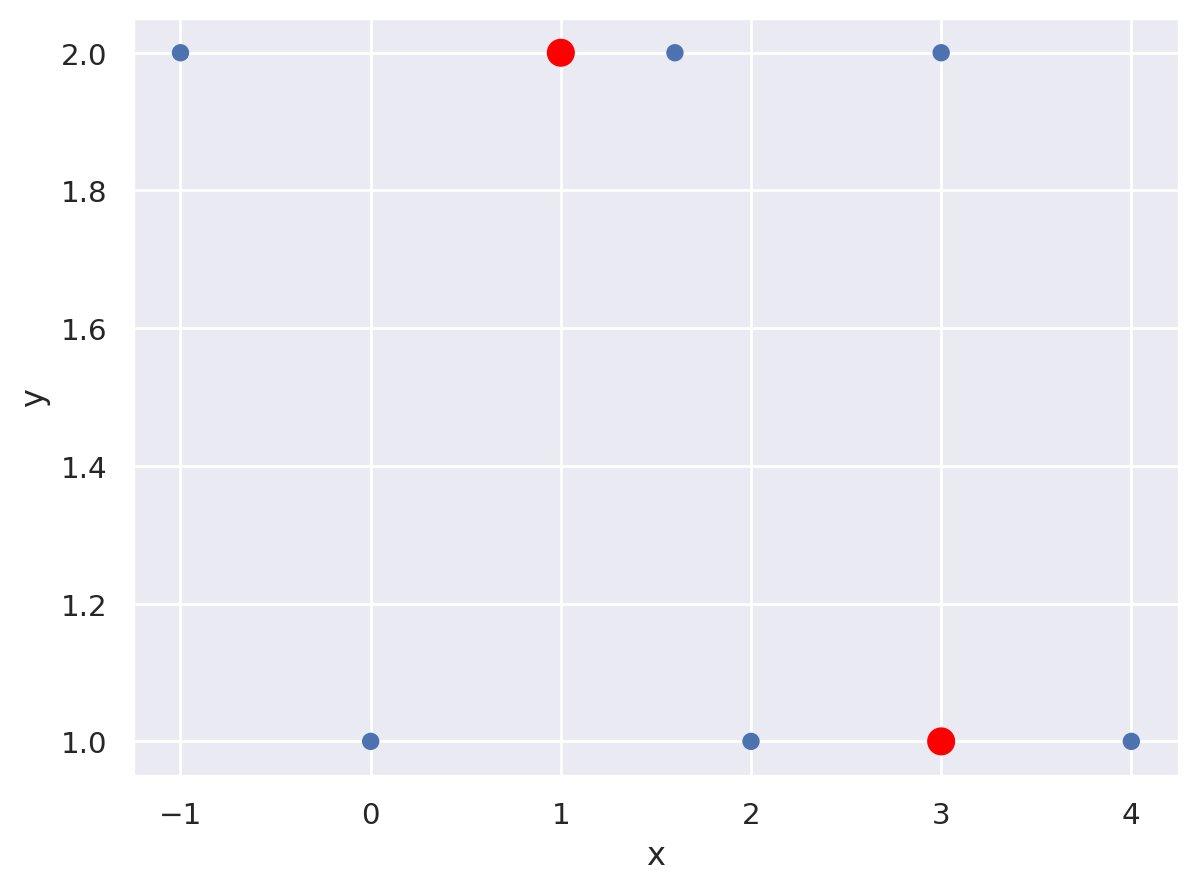

In [6]:
# Graficamos de nuevo

(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot())
    .add(so.Dot(color = "red", pointsize = 10),x = centros[:,0], y = centros[:,1])
)

In [7]:
# Ahora calculamos las distancias de cada punto a los centros
# y asignamos cada punto al centro más cercano
datos = np.array(df[['x', 'y']])
centro = centros[0]
distancias = np.linalg.norm(datos - centro, axis=1)
distancias

array([2.        , 1.41421356, 0.        , 0.6       , 1.41421356,
       2.        , 3.16227766])

In [8]:
# Item 2
def distancias_a_centros(datos, centros):
    k = len(centros)
    nDatos = len(datos)
    distMatrix = np.zeros((nDatos, k))
    for i, centro in enumerate(centros):
        dist = np.linalg.norm(datos - centro, axis = 1)
        distMatrix[:,i] = dist
    return(distMatrix)

In [9]:
# La probamos
distancias_a_centros(datos, centros)

array([[2.        , 4.12310563],
       [1.41421356, 3.        ],
       [0.        , 2.23606798],
       [0.6       , 1.72046505],
       [1.41421356, 1.        ],
       [2.        , 1.        ],
       [3.16227766, 1.        ]])

In [10]:
# Item 3
def calcular_etiquetas(datos, centros):
    distMatrix = distancias_a_centros(datos, centros)
    etiquetas = np.argmin(distMatrix, axis = 1)   # Array de enteros
    return(pd.Series(etiquetas.astype("str")))  # Convertimos los enteros a strings

In [11]:
etiquetas = calcular_etiquetas(datos, centros)
etiquetas.shape

(7,)

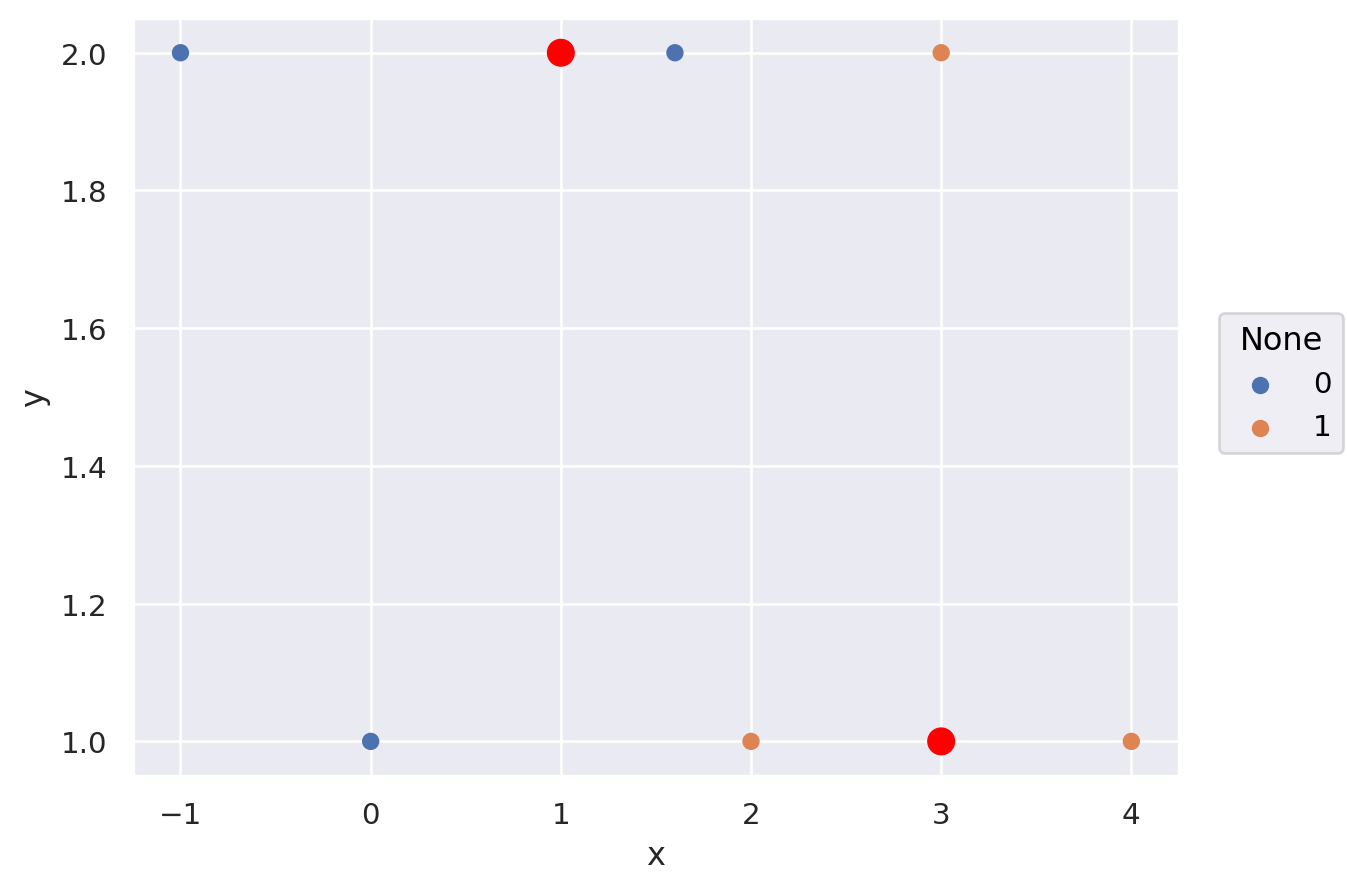

In [12]:
# Item 4
etiquetas = calcular_etiquetas(datos, centros)
(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot(), color = etiquetas)
    .add(so.Dot(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

In [13]:
# Calculemos los nuevos centros
def calcular_centros(datos, etiquetas):
    centros = np.zeros((2,2))
    for i, etiqueta in enumerate(etiquetas.unique()):
        cluster = datos[etiquetas == etiqueta, :]
        centro = cluster.mean(axis = 0)
        centros[i] = centro
    return(centros)

In [14]:
centros = np.array([[1, 2], [3, 1]])
etiquetas = calcular_etiquetas(datos, centros)
etiquetas

0    0
1    0
2    0
3    0
4    1
5    1
6    1
dtype: object

In [15]:
centrosNuevos = calcular_centros(datos, etiquetas)
centrosNuevos

array([[0.4       , 1.75      ],
       [3.        , 1.33333333]])

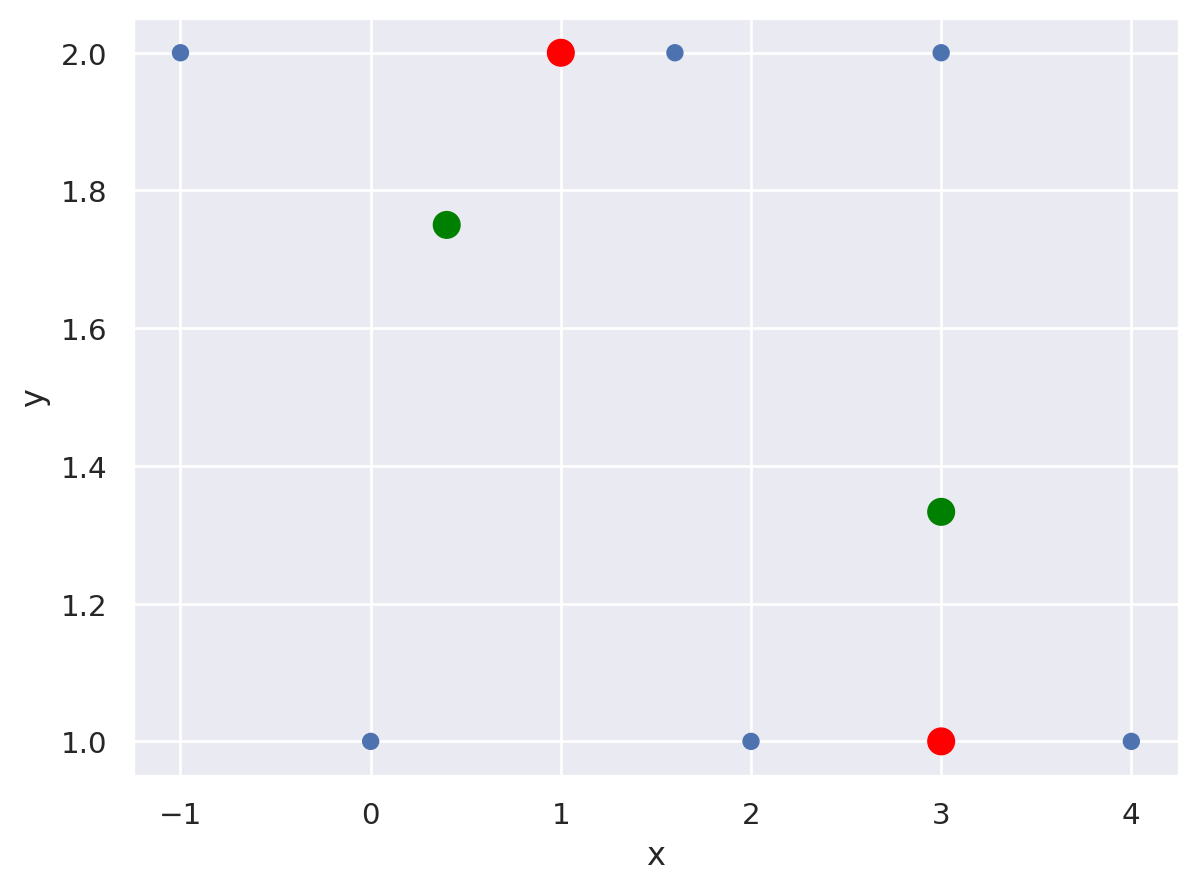

In [16]:
# Graficamos, en verde los nuevos centros, en rojo los antiguos
(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot())
    .add(so.Dot(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
    .add(so.Dot(color = "green", pointsize= 10), x = centrosNuevos[:,0], y = centrosNuevos[:,1])
)

## b) Ahora veamos con b1 = (0, 1) y b2 = (3, 2)

In [17]:
centros_b = np.array([[0, 1], [3, 2]])
datos_b = np.array(df[['x', 'y']])
etiquetas_b = calcular_etiquetas(datos_b, centros_b)
centrosNuevos_b = calcular_centros(datos_b, etiquetas_b)
centrosNuevos_b


array([[0.        , 1.66666667],
       [2.65      , 1.5       ]])

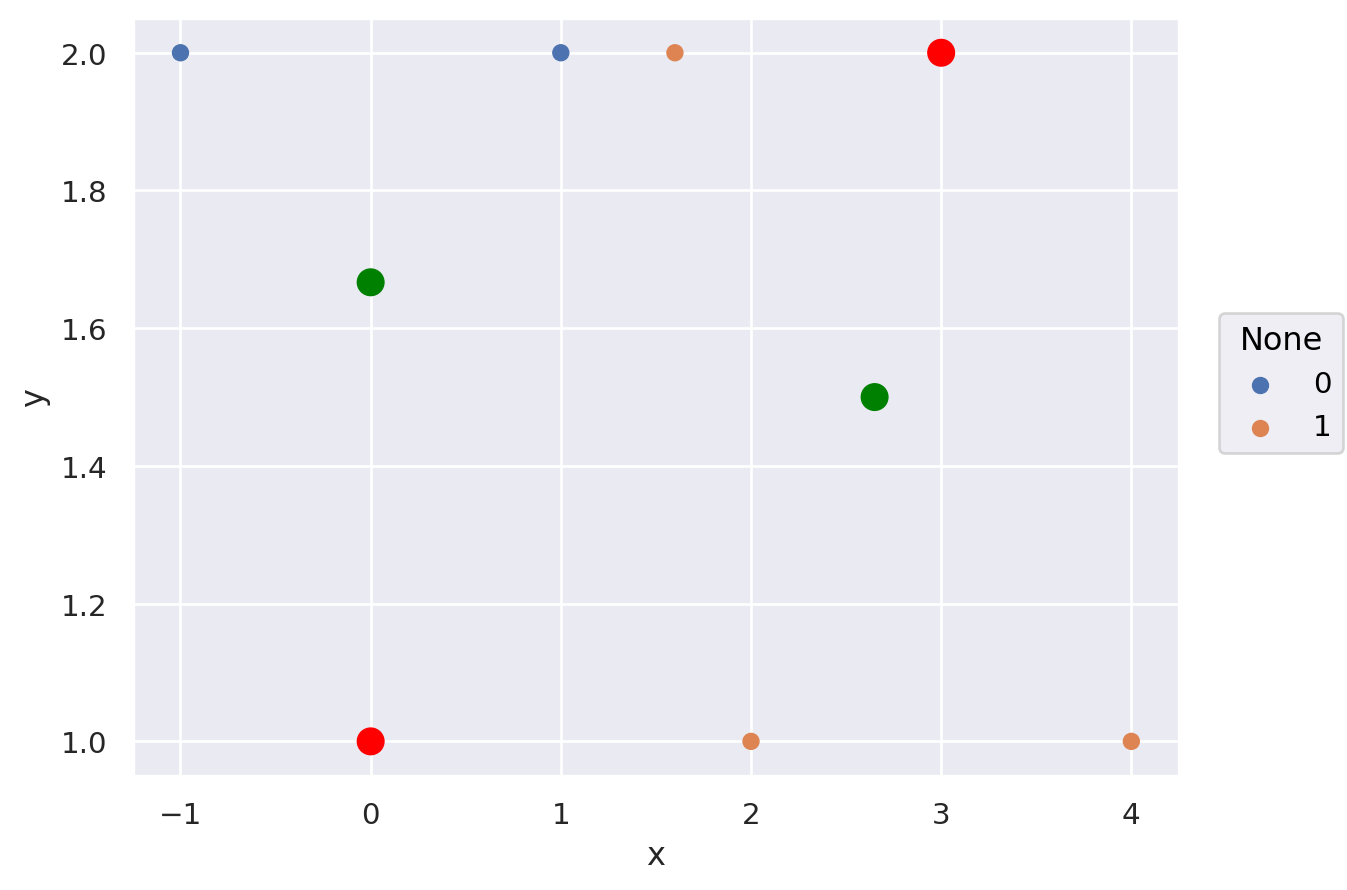

In [18]:
# graficamos los nuevos centros
(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot(), color = etiquetas_b)
    .add(so.Dot(color = "red", pointsize= 10), x = centros_b[:,0], y = centros_b[:,1])
    .add(so.Dot(color = "green", pointsize= 10), x = centrosNuevos_b[:,0], y = centrosNuevos_b[:,1])
)

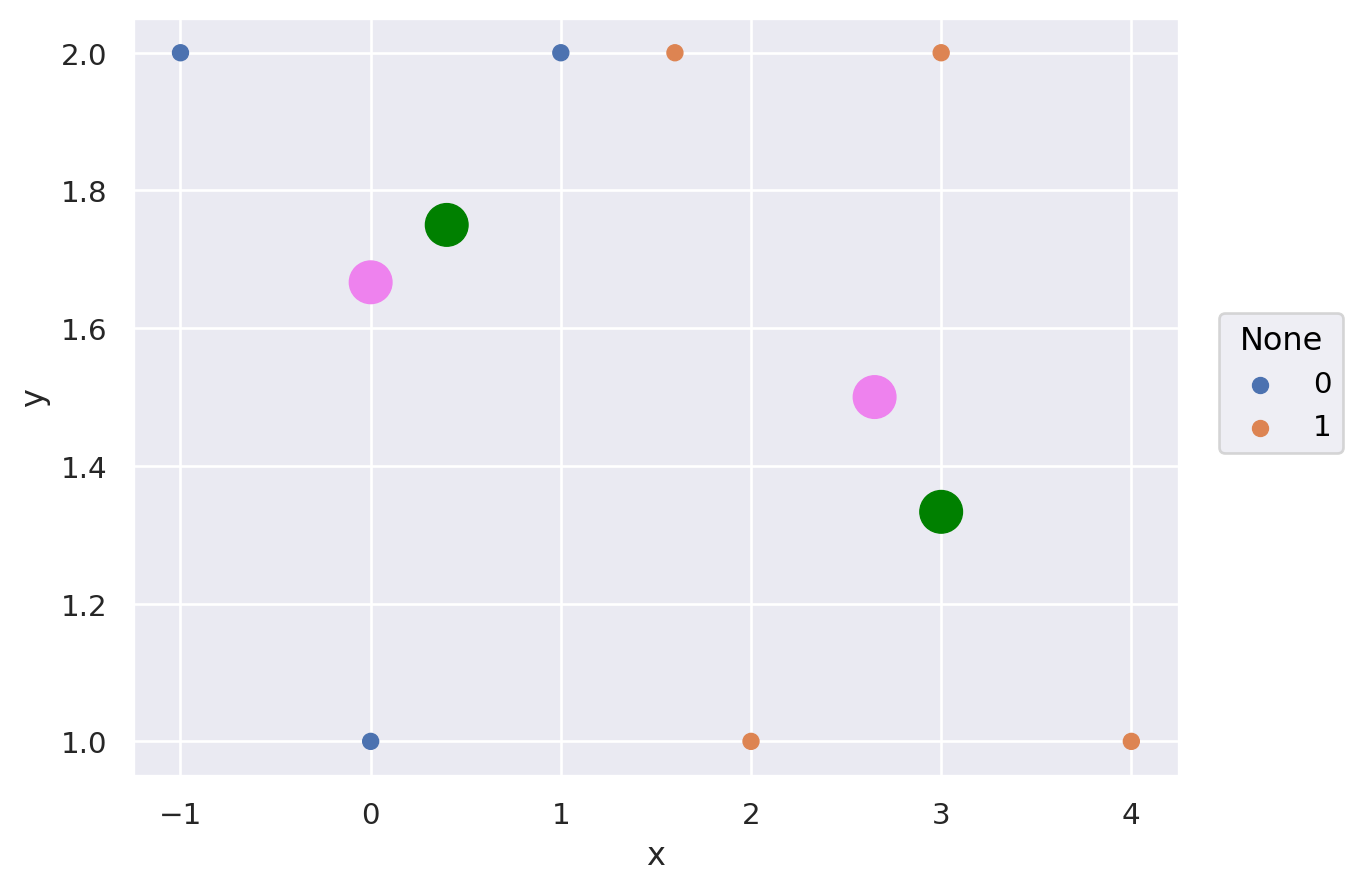

In [19]:
# graficamos los nuevos centros b2 y los anteriores centros b1

(
    so.Plot(x = df['x'], y = df['y'])
    .add(so.Dot(), color = etiquetas_b)
    .add(so.Dot(color = "violet", pointsize= 16), x = centrosNuevos_b[:,0], y = centrosNuevos_b[:,1])
    .add(so.Dot(color = "green", pointsize= 16), x = centrosNuevos[:,0], y = centrosNuevos[:,1])
)


Vemos que el b2 es mas apropiado para este caso.

# Ej 2: Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados.

## a) Abra cada dataset en Python y genere un diagrama de dispersi´on (scatter plot) para cada uno

In [20]:
# abrimos los datasets

data1 = pd.read_csv('dataset/p7-data1.csv')
data2 = pd.read_csv('dataset/p7-data2.csv')

data1.head()

,x,y
0,1.765881,-8.314427
1,6.483456,-3.332369
2,-8.480197,0.067655
3,4.706642,7.349470
4,4.502446,-8.135970


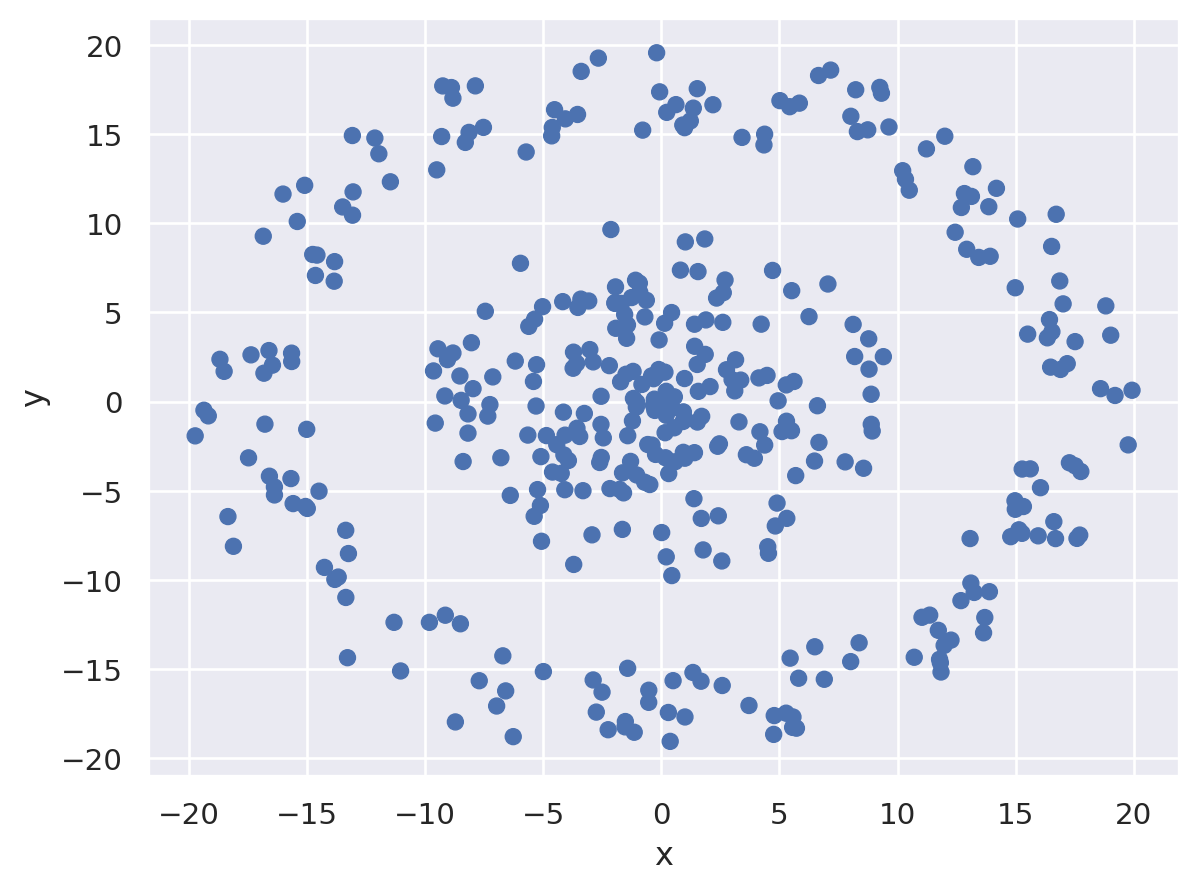

In [21]:
# generamos un diagrama de dispersión (scatter plot) de los datos

(    
    so.Plot(x = data1['x'], y = data1['y'])
    .add(so.Dot())
)   

## b) Analizando los graficos “a mano” considere cuantos clusters estan presentes.

Viendo asi a mano, podria decir que hay al menos 2 clusters, 1 al centro y el otro disperso por fuera. pero no estoy para nada seguro

## c) Pruebe ejecutar el comando KMeans con la cantidad de clusters que detectó. Analizar el comportamiento del procedimiento en cada caso.

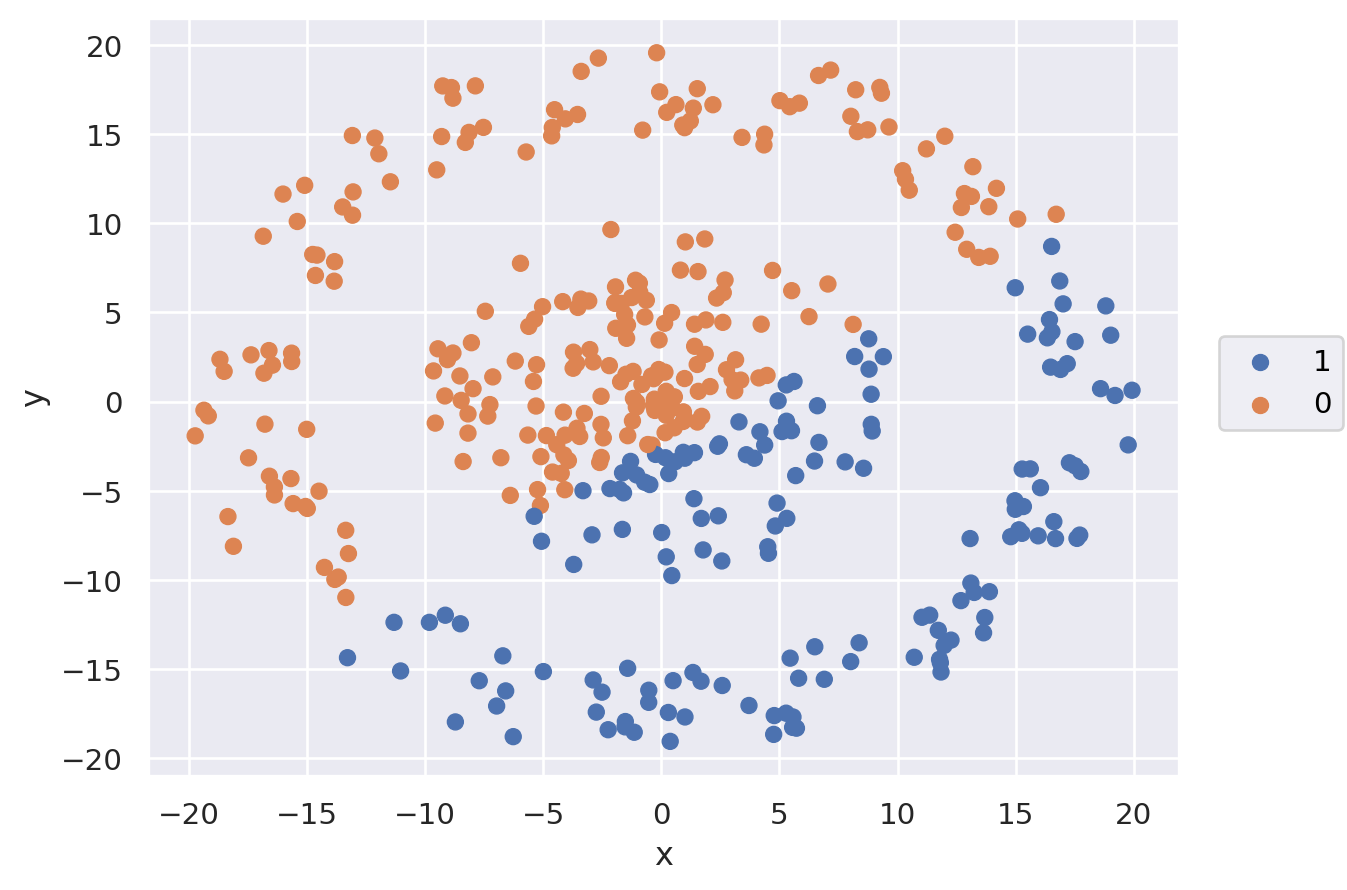

In [22]:
# Usamos el comando kmeans
kmeans = KMeans(n_clusters = 2)

# Asignamos cada observación a un cluster
etiquetas = kmeans.fit_predict(data1)

# graficamos
(
    so.Plot(x = data1['x'], y = data1['y'])
    .add(so.Dot(), color = etiquetas.astype("str"))
)

Muy probable que me haya equivocado, siento que hay que particionar en mas clusters

# Ej 3: Considerar el dataset p7-iris.txt (para leer el archivo, observar que los datos estan separados por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.

In [23]:
# a)
# el dataframe esta separado por tabulaciones, por lo que usamos el comando sep = '\t'
iris = pd.read_csv('dataset/p7-iris.txt', sep = '\t')   
iris

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


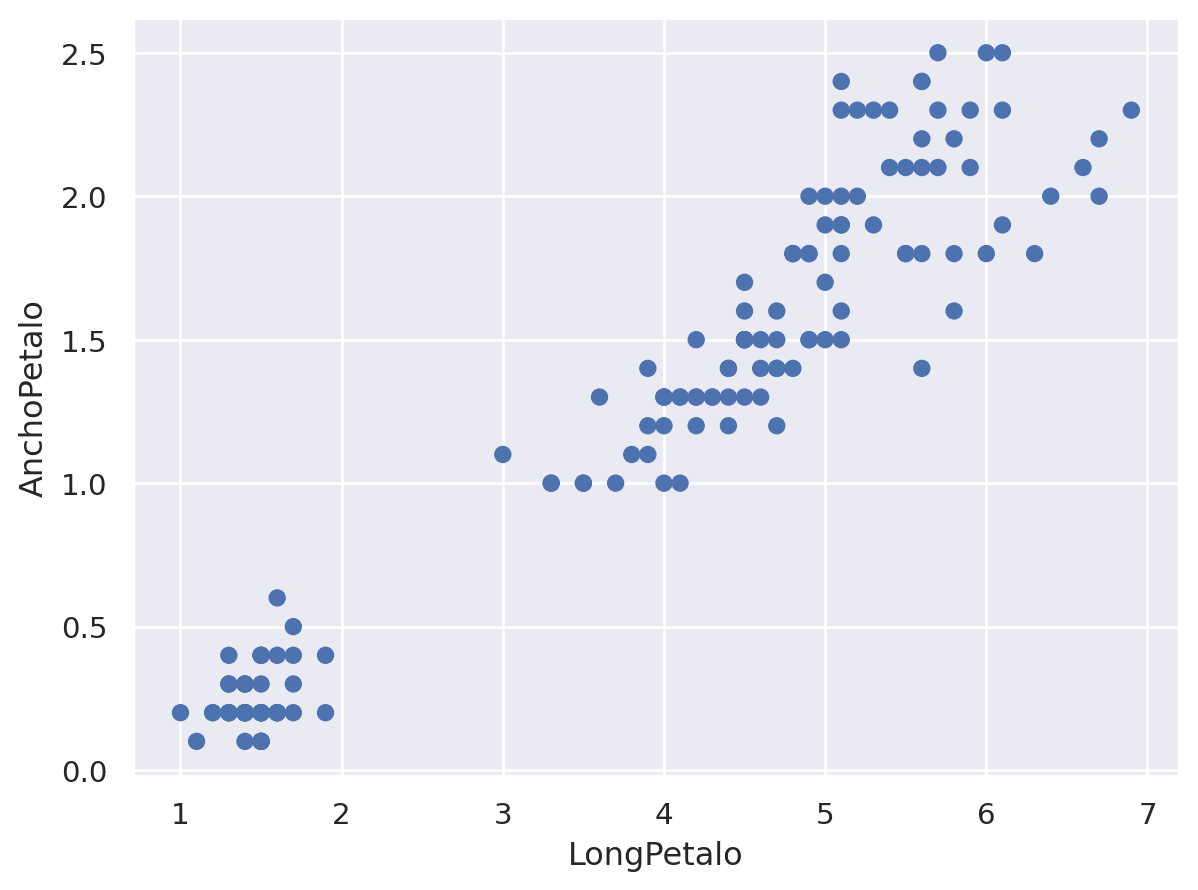

In [24]:
# b) Graficamos en un diagrama de dispersión la longitud del petalo y el ancho del petalo
(
    so.Plot(x = iris['LongPetalo'], y = iris['AnchoPetalo'])
    .add(so.Dot())
)

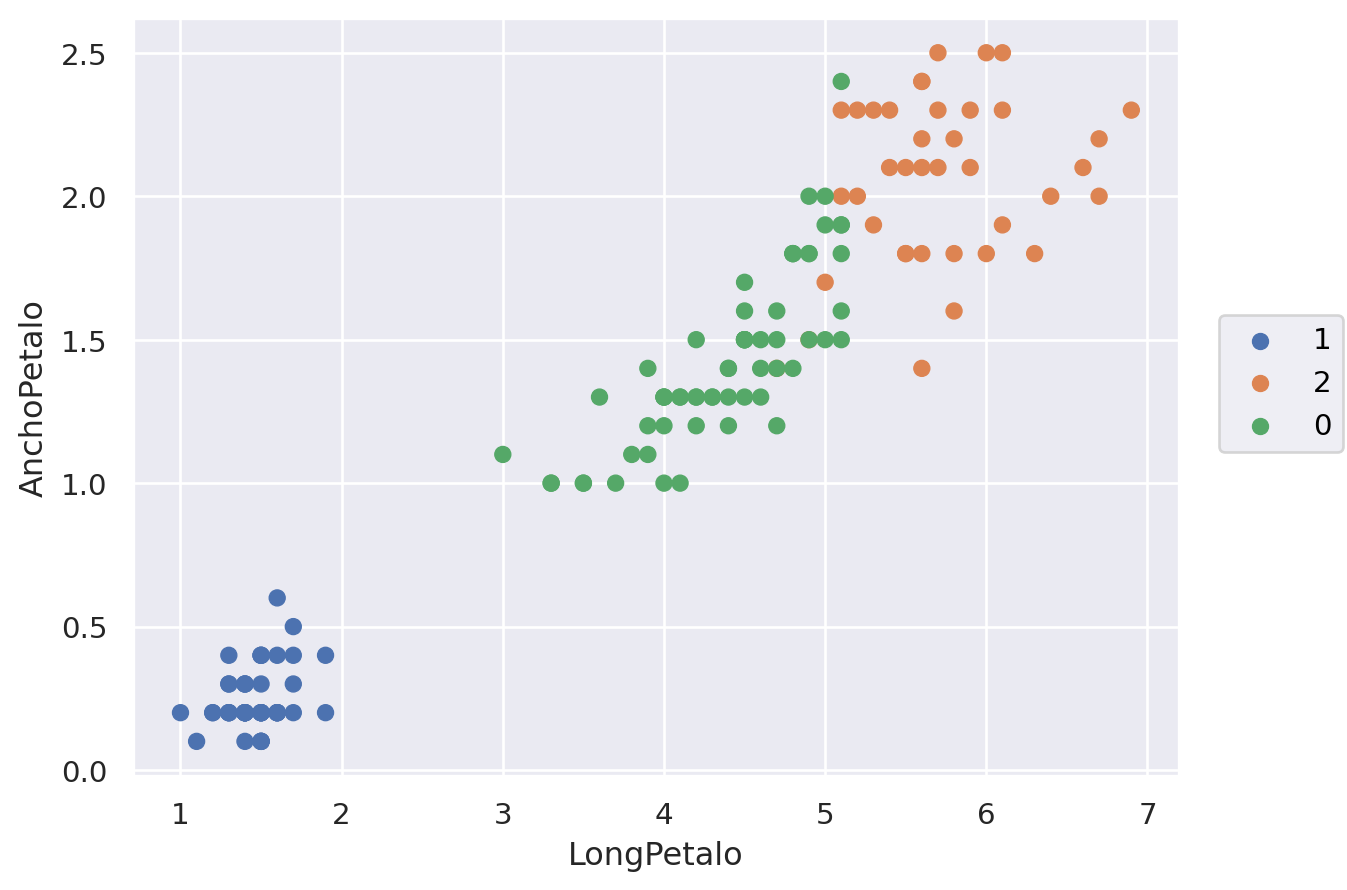

In [25]:
# c) Efectuamos un clustering k-means con k = 3 de los datos basados en las 4 columnas de datos.
kmeans = KMeans(n_clusters = 3)

# Asignamos cada observación a un cluster
etiquetas = kmeans.fit_predict(iris)

# d) graficamos y coloreamos segun el cluster
(
    so.Plot(x = iris['LongPetalo'], y = iris['AnchoPetalo'])
    .add(so.Dot(), color = etiquetas.astype("str"))
)

¡Se ve genial!

e) Evalue el error de clustering en funcion de la siguiente formula (within-cluster sum of squares, WCSS)

----

La fórmula de WCSS (Within-Cluster Sum of Squares) se utiliza para calcular la suma de los cuadrados de las distancias de cada punto dentro de un clúster a su centroide. Esta medida se utiliza en algoritmos de clustering, como K-means, para evaluar la calidad de la agrupación.

La fórmula de WCSS se calcula de la siguiente manera:

WCSS = ΣΣ||x - μ_i||²